In [83]:
import pandas as pd
import seaborn as srn
import matplotlib.pyplot as plt
import statistics as st

In [84]:
tabela = pd.read_csv("dados.csv", sep=";")
tabela.head()

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
0,106,SANTANA DO LIVRAMENTO,12240.76,1088666.10
1,113,SANTO ANGELO,16575.82,800669.92
2,118,SAO FRANCISCO DE ASSIS,12037.61,466122.80
3,13,CACAPAVA DO SUL,13674.54,485535.86
4,120,SAO GABRIEL,19912.38,533719.86


In [16]:
tabela.shape

(187, 4)

In [16]:
tabela.isnull().sum()

CODIGO;MUNICIPIO;PIB;VALOREMPENHO    0
dtype: int64

In [38]:
#Remover as possíveis linhas duplicadas
tabela = tabela.drop_duplicates()
tabela


1    187
dtype: int64

In [49]:
#Viusualizar quantos municípios tem no dataframe
tabela['MUNICIPIO'].count()
tabela[tabela.duplicated(['MUNICIPIO'], keep= False)]

,CODIGO,MUNICIPIO,PIB,VALOREMPENHO
18,259,CERRO BRANCO,11961.10,208240.50
19,259,MONTE ALEGRE DOS CAMPOS,11961.10,208240.50
21,259,CERRO BRANCO,12467.25,208240.50
22,259,MONTE ALEGRE DOS CAMPOS,12467.25,208240.50
41,141,DOUTOR MAURICIO CARDOSO,13628.17,147767.38
42,141,TAQUARA,13628.17,147767.38
57,141,DOUTOR MAURICIO CARDOSO,18628.78,147767.38
58,141,TAQUARA,18628.78,147767.38
82,378,MULITERNO,16581.60,97594.98
83,378,SANTO ANTONIO DAS MISSOES,16581.60,97594.98


In [71]:
#Agrupar empenho dos municípios que estão repetidos
tabela = tabela.groupby('MUNICIPIO').agg({
            'PIB': 'first',
            'VALOREMPENHO': sum
        })
tabela

,PIB,VALOREMPENHO
MUNICIPIO,,
AGUDO,16444.80,134912.00
AJURICABA,20784.67,180603.16
ALECRIM,11431.18,70277.71
ALMIRANTE TAMANDARE DO SUL,26895.37,31936.85
ALTO FELIZ,13209.54,82293.86
...,...,...
VERA CRUZ,18417.96,246386.96
VIADUTOS,12520.25,38128.96
VICTOR GRAEFF,26700.28,79029.29


<AxesSubplot:xlabel='MUNICIPIO'>

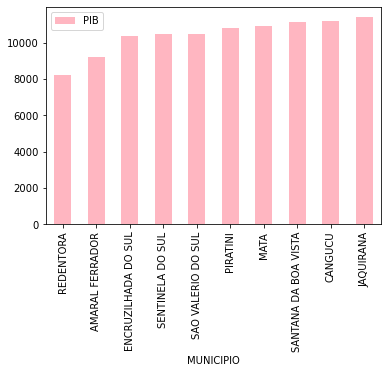

In [86]:
#Plot bar do desempenho do PIB por município

agrupado = tabela.sort_values('PIB').head(10)
agrupado = agrupado.iloc[:, 1:3]
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='PIB', color = 'lightpink')



<AxesSubplot:xlabel='MUNICIPIO'>

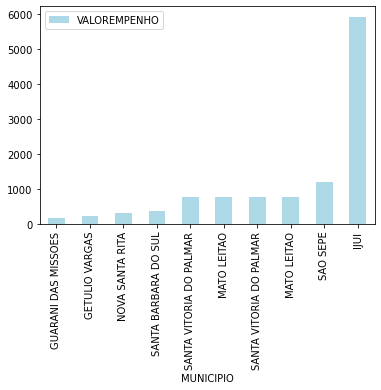

In [88]:
#Plot bar do VALOREMPENHO por município
agrupado = tabela.sort_values('VALOREMPENHO').head(10)
agrupado = agrupado.iloc[:,[1,3]]
agrupado
agrupado.plot.bar(x='MUNICIPIO',y='VALOREMPENHO', color = 'lightblue')